<h1 style="text-align: center;">MoMo: Practice 3</h1>
<h3 style="text-align: center;">Diego Ontiveros</h3>
<br />
<center>In this notebook the data gathered from the MD simulation is analysed and visualized.</center>
<br />
<br />

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading data from file
dataT = np.loadtxt("thermodynamics_raw.dat",skiprows=0)
dataV1 = np.loadtxt("initialV.dat",skiprows=2,usecols=(1,2,3))
dataV2 = np.loadtxt("finalV.dat",skiprows=2,usecols=(1,2,3))

data = dataT.T      # Each parameter in a column

t,Epot,Ekin,E,p,Tinst = data
print(data.shape)

(6, 500000)


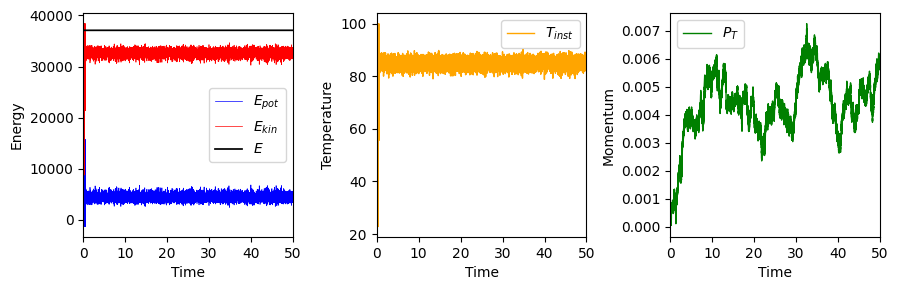

In [3]:
# Plotting data
fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

start = 0     # Starting from a equilibrated point
colors = ["blue","red","black"]
for i,e in enumerate([Epot,Ekin,E]):
    if i == 2: lw=1.25
    else: lw=0.5
    ax1.plot(t[start:],e[start:],c=colors[i], lw=lw)
    
ax2.plot(t[start:],Tinst[start:],c="orange",lw=1)
ax3.plot(t[start:],p[start:],c="green",lw=1)


ax1.set_xlim(0,t[-1]);ax2.set_xlim(0,t[-1]);ax3.set_xlim(0,t[-1])
ax1.set_xlabel("Time");ax1.set_ylabel("Energy")
ax2.set_xlabel("Time");ax2.set_ylabel("Temperature")
ax3.set_xlabel("Time");ax3.set_ylabel("Momentum")
# ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.2f'))
ax1.legend(["$E_{pot}$","$E_{kin}$","$E$"]); ax2.legend(["$T_{inst}$"]);ax3.legend(["$P_{T}$"])
fig.tight_layout()
fig.savefig("data1.png", dpi=600) # Saving the resulting plot

#You can consider the system at equilibrium since time=5 (50000th frame)

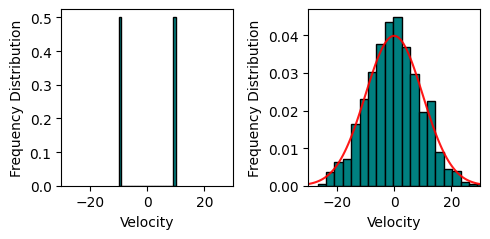

In [3]:
dataV1 = dataV1.flatten()
dataV2 = dataV2.flatten()

fig = plt.figure(figsize=(5,2.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

n_bins = 20
rang = 30

ax1.hist(dataV1,bins=n_bins,density=True,color="Teal",edgecolor="k")
ax2.hist(dataV2,bins=n_bins,density=True,color="Teal",edgecolor="k")

def mb(T,v): return (1/np.sqrt(2*np.pi*T))*np.exp(-v**2/(2*T))
v = np.linspace(-rang,rang,100)

mbd = mb(100,v)
ax2.plot(v,mbd, color="red", alpha=0.9)    


ax1.set_xlim(-rang,rang);ax2.set_xlim(-rang,rang)
ax1.set_xlabel("Velocity");ax1.set_ylabel("Frequency Distribution")
ax2.set_xlabel("Velocity");ax2.set_ylabel("Frequency Distribution")
# ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.2f'))
fig.tight_layout()
fig.savefig("data2.png", dpi=600) # Saving the resulting plot


In [6]:
# Block Averages
start = 0            # Starting from equilibated frame
n = t.shape[0]-start     # Number of data points 
N = 1000                 # Number of blocks
Nb = int(n/N)            # Number of points per block

data_labels = ["Epot","Ekin","E","Pt","Tinst"]
data_averaged = []
header = ""
for i,d in enumerate(data):
    d = d[start:].reshape(N,Nb).copy()      # Reshaping 1D array to (N,Nb) shape
    bav_d = np.mean(d,axis=-1)              # Block averages each Nb points
    data_averaged.append(bav_d)
    bav = np.mean(bav_d)                    # Block average 
    bstd_d = np.std(d,axis=-1)              # standard deviation of one block
    bstd = np.std(bav_d)/np.sqrt(N-1)       # standard deviation of the blocks

    if i > 0: 
        line = f"{data_labels[i-1]:5} = {bav:10.3f} +- {bstd:.5f}"
        print(line)
        header += line+"\n"

data_averaged = np.array(data_averaged)
np.savetxt("thermodynamics.dat",data_averaged.T,fmt="%.6e",
header=header + f"Using {N} blocks of {Nb} points, starting from the {start}th frame (equilibrium achieved)\n")

Epot  =   4382.932 +- 13.91593
Ekin  =  32705.826 +- 13.91339
E     =  37088.758 +- 0.03158
Pt    =      0.004 +- 0.00004
Tinst =     85.171 +- 0.03623
